In [1]:
import pandas as pd
import numpy as np
!pip install dabl
import dabl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
train= pd.read_csv('/content/drive/MyDrive/WIDS Stanford/TrainingWiDS2021.csv/TrainingWiDS2021.csv')
test= pd.read_csv('/content/drive/MyDrive/WIDS Stanford/UnlabeledWiDS2021.csv/UnlabeledWiDS2021.csv')
sample= pd.read_csv('/content/drive/MyDrive/WIDS Stanford/SampleSubmissionWiDS2021.csv')
solu= pd.read_csv('/content/drive/MyDrive/WIDS Stanford/SolutionTemplateWiDS2021.csv')
desc= pd.read_csv('/content/drive/MyDrive/WIDS Stanford/DataDictionaryWiDS2021.csv')

In [3]:
train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
train.shape

(130157, 181)

In [5]:
test.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,...,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,...,NaN,NaN,NaN,NaN,NaN,2.2,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,Floor,82,admit,Med-Surg ICU,0.003472,0,NaN,3.2,302.0,109.01,0,0,0.9,24.0,0.77,NaN,4.0,6.0,0.0,5.0,84.0,104.0,34.8,0,117.0,NaN,NaN,NaN,NaN,38.0,...,32.0,11.8,11.8,36.6,36.6,2.9,2.4,NaN,NaN,243.0,243.0,3.6,3.6,141.0,141.0,6.6,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,Floor,82,admit,Med-Surg ICU,0.884028,0,NaN,NaN,113.0,501.05,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,110.0,NaN,0,61.0,NaN,NaN,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,Accident & Emergency,82,admit,Med-Surg ICU,0.013194,0,NaN,3.4,117.0,106.01,0,0,0.4,26.0,1.50,NaN,4.0,6.0,0.0,5.0,99.0,34.0,33.0,0,136.0,NaN,NaN,NaN,NaN,35.0,...,30.0,10.7,10.7,33.0,33.0,1.1,1.1,NaN,NaN,154.0,154.0,4.0,4.0,133.0,133.0,6.2,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [6]:
test.shape

(10234, 180)

In [7]:
col= train.columns
col= pd.DataFrame(col)

In [8]:
missing_value=train.isnull().sum()
missing= missing_value[missing_value>0]

In [9]:
#len(missing)

In [10]:
test_clean = dabl.clean(test, verbose=0)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


In [11]:
sample.shape

(3, 2)

In [12]:
test_clean.shape

(10234, 168)

In [13]:
train_clean = dabl.clean(train, verbose=0)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


In [14]:
train_clean.shape

(130157, 169)

/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 157 continuous features
Linear Discriminant Analysis training set score: 0.631


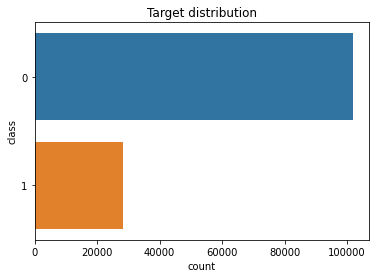

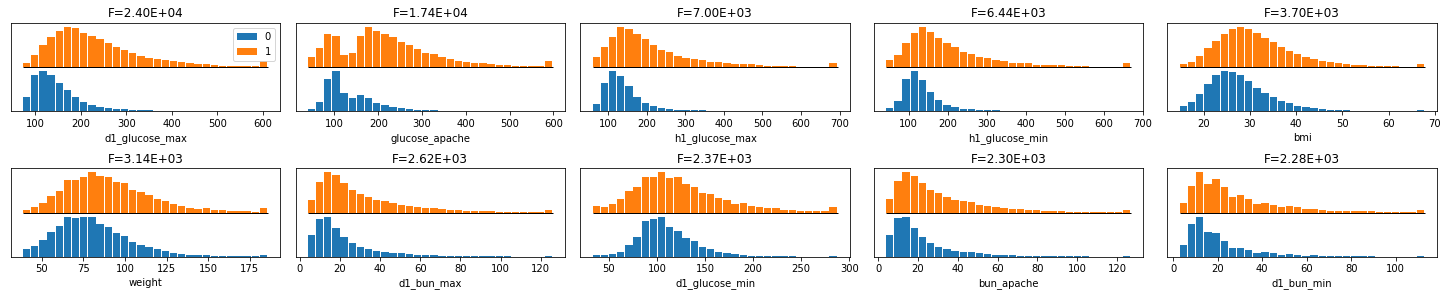

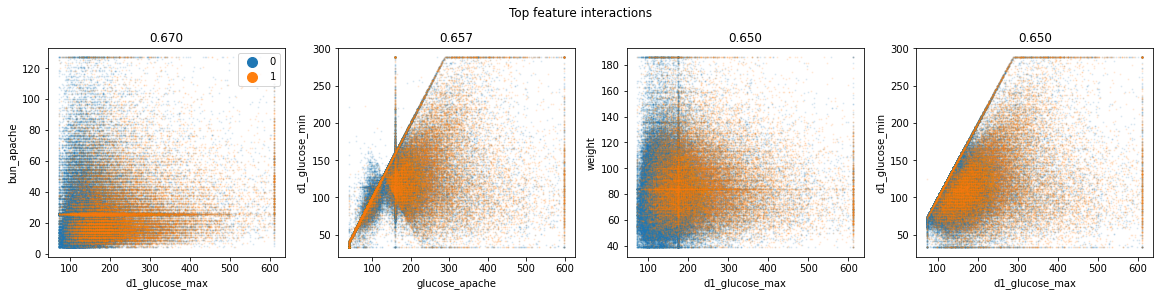

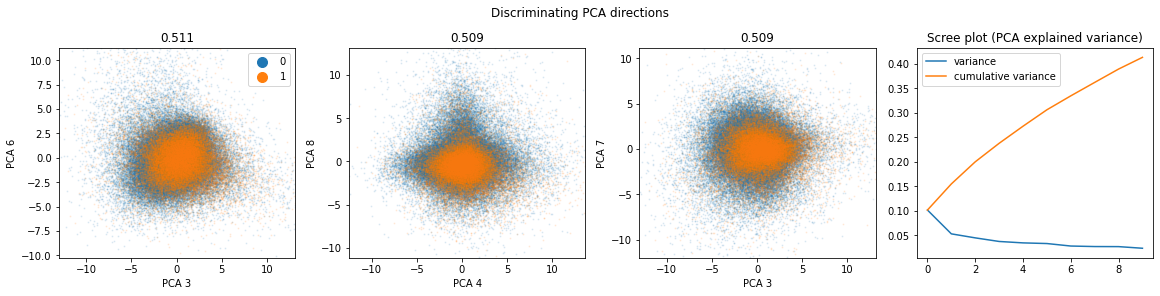

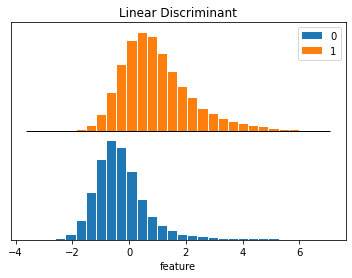

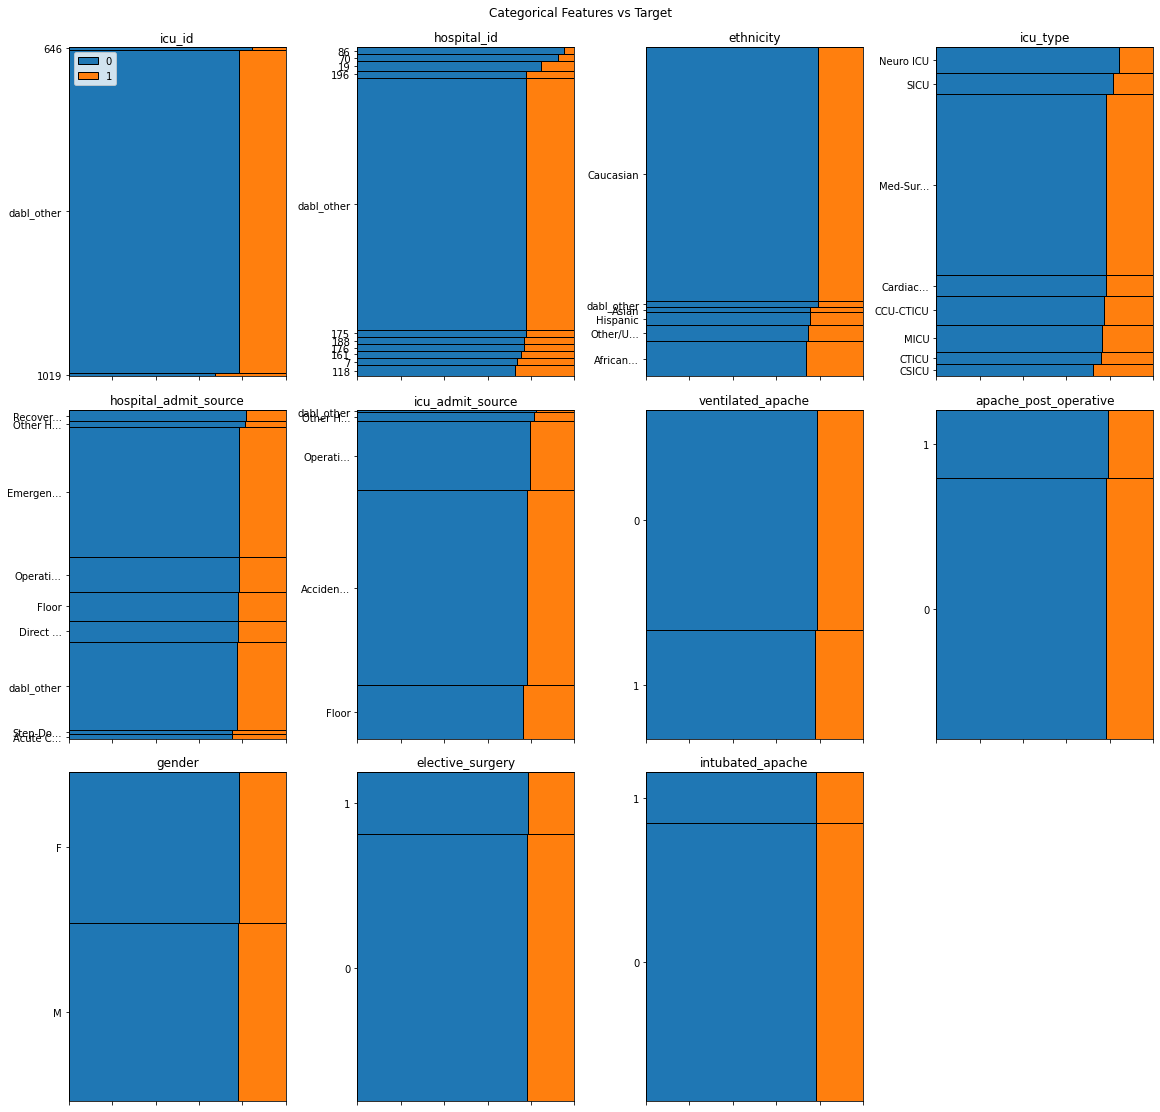

In [15]:
dabl.plot(train, 'diabetes_mellitus')

In [16]:
X = train_clean.drop("diabetes_mellitus", axis=1)
y = train_clean.diabetes_mellitus

In [17]:
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size= 0.2, random_state=999)
sc = dabl.SimpleClassifier().fit(train_x, train_y)

Running DummyClassifier(strategy='prior')
accuracy: 0.783 average_precision: 0.217 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.439
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.783 average_precision: 0.217 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.439

Running GaussianNB()
accuracy: 0.285 average_precision: 0.230 roc_auc: 0.535 recall_macro: 0.534 f1_macro: 0.272
=== new best GaussianNB() (using recall_macro):
accuracy: 0.285 average_precision: 0.230 roc_auc: 0.535 recall_macro: 0.534 f1_macro: 0.272

Running MultinomialNB()
accuracy: 0.789 average_precision: 0.410 roc_auc: 0.707 recall_macro: 0.555 f1_macro: 0.552
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.789 average_precision: 0.410 roc_auc: 0.707 recall_macro: 0.555 f1_macro: 0.552

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.727 average_precision: 0.366 roc_auc: 0.724 recall_macro: 0.724 f1_macro: 0.670
=== new best DecisionTreeClas

In [18]:
pred= sc.predict_proba(val_x)[:,1]

In [25]:
pred_y= sc.predict(val_x)

In [19]:
#print("Accuracy score", sc.score( pred, val_y))

In [20]:
#sc.fit(X,y)

In [21]:
test_yhat= sc.predict_proba(test_clean)[:,1]

In [22]:
submission = test[['encounter_id','hospital_id']]

In [23]:
submission['diabetes_mellitus']= test_yhat
submission.drop('hospital_id', 1, inplace= True)
submission.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,encounter_id,diabetes_mellitus
0,144740,0.998479
1,141990,0.998696
2,142038,0.999296
3,138628,0.997674
4,141682,0.999726


In [24]:
submission.to_csv("wids_csv", index=False)

In [26]:
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     20463
           1       0.49      0.74      0.59      5569

    accuracy                           0.78     26032
   macro avg       0.70      0.76      0.72     26032
weighted avg       0.83      0.78      0.79     26032

